# CALORIES FORMULA

Men:

Metric	BMR = 66.5 + ( 13.76 × weight in kg ) + ( 5.003 × height in cm ) – ( 6.755 × age in years )

Imperial	BMR = 66 + ( 6.2 × weight in pounds ) + ( 12.7 × height in inches ) – ( 6.76 × age in years )

Women:

Metric BMR = 655 + ( 9.563 × weight in kg ) + ( 1.850 × height in cm ) – ( 4.676 × age in years )

Imperial BMR = 655 + ( 4.35 × weight in pounds ) + ( 4.7 × height in inches ) - ( 4.7 × age in years )

In [1]:
import pandas as pd
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import pointbiserialr
from statsmodels.graphics.mosaicplot import mosaic
import scipy.stats as ss
import numpy as np
from matplotlib import pyplot as plt
import random

In [2]:
def harris_benedict_formula(age, gender, body_weight, body_height, physical_level): # height in cm, weigh in kg
    if gender == "M":
        result = (66.5 + 13.76*(body_weight) + 5.003*(body_height)) - (6.755*age)
        if physical_level == 'Low':
            result = result * 1.2
            return result
        if physical_level == 'Average':
            result = result * 1.55
            return result
        if physical_level == 'High':
            result = result * 1.725
            return result
    if gender == "F":
        result = (665 + 9.563*(body_weight) + 1.850*(body_height)) - (4.676*age)
        if physical_level == 'Low':
            result = result * 1.2
            return result
        if physical_level == 'Average':
            result = result * 1.55
            return result
        if physical_level == 'High':
            result = result * 1.725
            return result

# Test the formula on our data

In [3]:
WEIGHT_TYPE = {
    'Under Weight': [16, 18.5],
    'Healthy': [18.6, 25],
    'Over Weight': [25.1, 30], 
    'Obese': [30.1, 35],
    'Not Available': [24.37, 24.37], # average bmi is 24.37
}

AGE_GROUPS = { 
    'Yankys': [20, 44], 
    'Nesting Families': [1, 10], 
    'Matured Families': [20, 77], # upper bound is 77 because average life expectancy of msian is 76.16 yo
    'Teens and Toddlers': [1, 19], 
    'Empty Nesters': [45, 77], 
    'Teens Aches': [10, 19],
}

HEIGHT = {
    'M': [160, 185], # 164.7cm is the average 
    'F': [150, 170], # 153.3cm is the average
}

ACTIVE_LEVEL = {
    'Under Weight': ['Low'],
    'Healthy': ['Average', 'High'],
    'Over Weight': ['Low', 'High'], 
    'Obese': ['Low'],
    'Not Available': ['Low', 'Average', 'High']
}


In [4]:
data = pd.read_excel("./data/DACC_Hackathon_Panelists_Demogs.xlsx")

In [5]:
data

,ID,BMI,Ethnicity,Strata,Location,Lifestage,#HH,Income
0,Panel 101011101,Obese,Malay,Urban,North,Empty Nesters,1-3 Member HH,<RM2000 (Low)
1,Panel 101016101,Healthy,Malay,Urban,North,Yankys/Matured Families,1-3 Member HH,<RM2000 (Low)
2,Panel 101019101,Obese,Malay,Urban,North,Teens Aches,4-5 Member HH,<RM2000 (Low)
3,Panel 101024101,Over Weight,Chinese,Urban,North,Nesting Families,1-3 Member HH,<RM2000 (Low)
4,Panel 105009103,Over Weight,Malay,Rural,North,Empty Nesters,1-3 Member HH,<RM2000 (Low)
...,...,...,...,...,...,...,...,...
3913,Panel 802312801,Not Available,Malay,Urban,Central,Nesting Families,4-5 Member HH,RM5000-RM7999 (Mid High)
3914,Panel 802313601,Not Available,Malay,Urban,Central,Teens and Toddlers,6+ Member HH,RM3000-RM4999 (Mid Low)
3915,Panel 802314001,Not Available,Malay,Urban,North,Teens and Toddlers,6+ Member HH,RM5000-RM7999 (Mid High)
3916,Panel 802315101,Not Available,Malay,Urban,Central,Teens Aches,4-5 Member HH,RM5000-RM7999 (Mid High)


In [6]:
panelists_demog = {} 

In [7]:
random.seed(42)
data['ID'] = data['ID'].apply(lambda x: x[6:])
data['Gender'] = data.apply(lambda x: random.choice(['M', 'F']), axis=1) # assigning random gender to our panelists

In [8]:
data.head()

,ID,BMI,Ethnicity,Strata,Location,Lifestage,#HH,Income,Gender
0,101011101,Obese,Malay,Urban,North,Empty Nesters,1-3 Member HH,<RM2000 (Low),M
1,101016101,Healthy,Malay,Urban,North,Yankys/Matured Families,1-3 Member HH,<RM2000 (Low),M
2,101019101,Obese,Malay,Urban,North,Teens Aches,4-5 Member HH,<RM2000 (Low),F
3,101024101,Over Weight,Chinese,Urban,North,Nesting Families,1-3 Member HH,<RM2000 (Low),M
4,105009103,Over Weight,Malay,Rural,North,Empty Nesters,1-3 Member HH,<RM2000 (Low),M


In [9]:
for id in data.iloc:

    panelists_demog[id['ID']] = {}

    gender = id['Gender']
    print("Gender: ", gender)

    bmi_cat = id['BMI']
    print("BMI CAT: ", bmi_cat)

    lifestages = id['Lifestage'].split('/')
    print("lifestage:, ", lifestages)

    # simulating height values
    height = round(random.uniform(HEIGHT[gender][0], HEIGHT[gender][1]), 1)
    print("Height: ", height)

    # simulating bmi value, and thereafter calculating weight from simulated bmi and height values
    for weight_type in WEIGHT_TYPE:
        if bmi_cat == weight_type:
            lower_bound = WEIGHT_TYPE[weight_type][0]
            upper_bound = WEIGHT_TYPE[weight_type][1]
            bmi = round(random.uniform(lower_bound, upper_bound), 1) # 1 dp
            print("BMI: ", bmi)
            weight = (bmi/10000) * (height**2)
            print("Weight: ", weight)
            physical_level = random.choice(ACTIVE_LEVEL[bmi_cat])
            print("Physical Level: ", physical_level)

    # simulating age from age categories
    age_lst = []
    for lifestage in lifestages:
        if lifestage in AGE_GROUPS:
            age = random.randint(AGE_GROUPS[lifestage][0], AGE_GROUPS[lifestage][1])
            age_lst.append(age)
    age = max(age_lst) # since the one that participated in the survey is the primary shopper in the household, we assume this person is the eldest in the family
    for lifestage in lifestages:
        if lifestage in AGE_GROUPS:
            yankys = [i for i in range(20, 45)]
            toddler = [i for i in range(1, 10)]
            empty_nesters = [i for i in range(45, 78)]
            teens_aches = [i for i in range(10, 20)]
            if age in yankys:
                panelists_demog[id['ID']]['Age_Category'] = 'Yankys'
            if age in toddler:
                panelists_demog[id['ID']]['Age_Category'] = 'Toddlers'
            if age in empty_nesters:
                panelists_demog[id['ID']]['Age_Category'] = 'Empty Nesters'
            if age in teens_aches:
                panelists_demog[id['ID']]['Age_Category'] = 'Teens Aches'

    print('Age: ', age)

    # simulating BMR values using harris benedict formula 
    est_calories = harris_benedict_formula(age=age, gender=gender, body_weight=weight, body_height=height, physical_level=physical_level)

    

    panelists_demog[id['ID']]['Weight'] = weight
    panelists_demog[id['ID']]['BMI_Value'] = bmi
    panelists_demog[id['ID']]['Physical Level'] = physical_level
    panelists_demog[id['ID']]['Age'] = age 
    panelists_demog[id['ID']]['Height'] = height
    panelists_demog[id['ID']]['BMR'] = est_calories


Gender:  M
BMI CAT:  Obese
lifestage:,  ['Empty Nesters']
Height:  175.0
BMI:  32.9
Weight:  100.75625
Physical Level:  Low
Age:  63
Gender:  M
BMI CAT:  Healthy
lifestage:,  ['Yankys', 'Matured Families']
Height:  183.7
BMI:  20.0
Weight:  67.49137999999999
Physical Level:  High
Age:  35
Gender:  F
BMI CAT:  Obese
lifestage:,  ['Teens Aches']
Height:  154.4
BMI:  32.1
Weight:  76.5243456
Physical Level:  Low
Age:  19
Gender:  M
BMI CAT:  Over Weight
lifestage:,  ['Nesting Families']
Height:  180.5
BMI:  26.0
Weight:  84.70864999999999
Physical Level:  High
Age:  3
Gender:  M
BMI CAT:  Over Weight
lifestage:,  ['Empty Nesters']
Height:  178.1
BMI:  26.8
Weight:  85.0085548
Physical Level:  High
Age:  49
Gender:  M
BMI CAT:  Healthy
lifestage:,  ['Teens and Toddlers']
Height:  165.7
BMI:  21.1
Weight:  57.933193900000006
Physical Level:  Average
Age:  1
Gender:  M
BMI CAT:  Obese
lifestage:,  ['Yankys', 'Matured Families']
Height:  165.1
BMI:  34.3
Weight:  93.4949743
Physical Level:  L

lifestage:,  ['Empty Nesters']
Height:  163.0
BMI:  33.9
Weight:  90.06890999999999
Physical Level:  Low
Age:  69
Gender:  M
BMI CAT:  Obese
lifestage:,  ['Teens and Toddlers']
Height:  179.3
BMI:  32.3
Weight:  103.8396227
Physical Level:  Low
Age:  7
Gender:  F
BMI CAT:  Healthy
lifestage:,  ['Teens and Toddlers']
Height:  159.2
BMI:  23.5
Weight:  59.559903999999996
Physical Level:  Average
Age:  16
Gender:  F
BMI CAT:  Over Weight
lifestage:,  ['Teens Aches']
Height:  157.8
BMI:  29.8
Weight:  74.2045032
Physical Level:  High
Age:  12
Gender:  M
BMI CAT:  Healthy
lifestage:,  ['Teens and Toddlers']
Height:  175.7
BMI:  18.9
Weight:  58.345226099999984
Physical Level:  Average
Age:  9
Gender:  M
BMI CAT:  Under Weight
lifestage:,  ['Teens Aches']
Height:  172.0
BMI:  16.7
Weight:  49.40528
Physical Level:  Low
Age:  10
Gender:  F
BMI CAT:  Obese
lifestage:,  ['Yankys', 'Matured Families']
Height:  167.3
BMI:  31.2
Weight:  87.3265848
Physical Level:  Low
Age:  60
Gender:  F
BMI CAT:

BMI:  34.2
Weight:  91.31249520000001
Physical Level:  Low
Age:  61
Gender:  M
BMI CAT:  Healthy
lifestage:,  ['Empty Nesters']
Height:  169.3
BMI:  24.1
Weight:  69.07660090000002
Physical Level:  High
Age:  75
Gender:  F
BMI CAT:  Under Weight
lifestage:,  ['Teens and Toddlers']
Height:  152.8
BMI:  16.5
Weight:  38.523936000000006
Physical Level:  Low
Age:  14
Gender:  M
BMI CAT:  Healthy
lifestage:,  ['Yankys', 'Matured Families']
Height:  179.1
BMI:  18.7
Weight:  59.983634699999996
Physical Level:  High
Age:  34
Gender:  M
BMI CAT:  Healthy
lifestage:,  ['Yankys', 'Matured Families']
Height:  178.6
BMI:  24.9
Weight:  79.4259204
Physical Level:  Average
Age:  31
Gender:  F
BMI CAT:  Healthy
lifestage:,  ['Yankys', 'Matured Families']
Height:  168.5
BMI:  24.9
Weight:  70.6967025
Physical Level:  High
Age:  42
Gender:  M
BMI CAT:  Healthy
lifestage:,  ['Empty Nesters']
Height:  181.7
BMI:  24.3
Weight:  80.2261827
Physical Level:  High
Age:  70
Gender:  M
BMI CAT:  Healthy
lifesta

Weight:  104.73034880000002
Physical Level:  Low
Age:  16
Gender:  M
BMI CAT:  Healthy
lifestage:,  ['Empty Nesters']
Height:  181.5
BMI:  24.3
Weight:  80.0496675
Physical Level:  High
Age:  56
Gender:  M
BMI CAT:  Over Weight
lifestage:,  ['Empty Nesters']
Height:  171.4
BMI:  27.2
Weight:  79.9080512
Physical Level:  High
Age:  69
Gender:  M
BMI CAT:  Healthy
lifestage:,  ['Empty Nesters']
Height:  168.9
BMI:  19.8
Weight:  56.48387580000001
Physical Level:  Average
Age:  76
Gender:  F
BMI CAT:  Under Weight
lifestage:,  ['Empty Nesters']
Height:  166.9
BMI:  16.6
Weight:  46.24031260000001
Physical Level:  Low
Age:  71
Gender:  F
BMI CAT:  Over Weight
lifestage:,  ['Yankys', 'Matured Families']
Height:  168.5
BMI:  27.9
Weight:  79.2143775
Physical Level:  Low
Age:  56
Gender:  F
BMI CAT:  Healthy
lifestage:,  ['Teens Aches']
Height:  159.7
BMI:  21.0
Weight:  53.55858899999999
Physical Level:  High
Age:  11
Gender:  M
BMI CAT:  Under Weight
lifestage:,  ['Yankys', 'Matured Familie

Weight:  70.02351070000002
Physical Level:  Low
Age:  18
Gender:  F
BMI CAT:  Healthy
lifestage:,  ['Yankys', 'Matured Families']
Height:  164.2
BMI:  19.9
Weight:  53.653663599999994
Physical Level:  High
Age:  54
Gender:  F
BMI CAT:  Obese
lifestage:,  ['Empty Nesters']
Height:  152.3
BMI:  32.4
Weight:  75.1527396
Physical Level:  Low
Age:  59
Gender:  F
BMI CAT:  Healthy
lifestage:,  ['Teens Aches']
Height:  156.4
BMI:  24.3
Weight:  59.4401328
Physical Level:  High
Age:  14
Gender:  F
BMI CAT:  Obese
lifestage:,  ['Teens and Toddlers']
Height:  151.1
BMI:  31.9
Weight:  72.83155989999999
Physical Level:  Low
Age:  16
Gender:  M
BMI CAT:  Healthy
lifestage:,  ['Teens Aches']
Height:  172.5
BMI:  23.9
Weight:  71.1174375
Physical Level:  High
Age:  18
Gender:  M
BMI CAT:  Under Weight
lifestage:,  ['Yankys', 'Matured Families']
Height:  177.0
BMI:  17.3
Weight:  54.19917
Physical Level:  Low
Age:  59
Gender:  F
BMI CAT:  Healthy
lifestage:,  ['Teens and Toddlers']
Height:  157.4
BMI

lifestage:,  ['Yankys', 'Matured Families']
Height:  184.8
BMI:  24.2
Weight:  82.6455168
Physical Level:  Average
Age:  48
Gender:  F
BMI CAT:  Healthy
lifestage:,  ['Teens and Toddlers']
Height:  156.3
BMI:  21.0
Weight:  51.302349
Physical Level:  High
Age:  2
Gender:  F
BMI CAT:  Over Weight
lifestage:,  ['Teens Aches']
Height:  150.7
BMI:  27.8
Weight:  63.13516219999999
Physical Level:  High
Age:  12
Gender:  M
BMI CAT:  Obese
lifestage:,  ['Yankys', 'Matured Families']
Height:  172.3
BMI:  30.8
Weight:  91.43685320000002
Physical Level:  Low
Age:  68
Gender:  F
BMI CAT:  Under Weight
lifestage:,  ['Teens Aches']
Height:  152.2
BMI:  17.7
Weight:  41.00176679999999
Physical Level:  Low
Age:  17
Gender:  F
BMI CAT:  Healthy
lifestage:,  ['Nesting Families']
Height:  161.2
BMI:  19.6
Weight:  50.93146239999999
Physical Level:  Average
Age:  7
Gender:  F
BMI CAT:  Healthy
lifestage:,  ['Teens and Toddlers']
Height:  155.3
BMI:  22.4
Weight:  54.02452160000001
Physical Level:  High
A

BMI:  24.8
Weight:  76.38462
Physical Level:  High
Age:  16
Gender:  F
BMI CAT:  Under Weight
lifestage:,  ['Yankys', 'Matured Families']
Height:  166.1
BMI:  16.2
Weight:  44.6945202
Physical Level:  Low
Age:  32
Gender:  F
BMI CAT:  Obese
lifestage:,  ['Teens Aches']
Height:  152.2
BMI:  30.2
Weight:  69.95781679999999
Physical Level:  Low
Age:  10
Gender:  F
BMI CAT:  Over Weight
lifestage:,  ['Teens Aches']
Height:  154.2
BMI:  28.3
Weight:  67.2907212
Physical Level:  Low
Age:  16
Gender:  M
BMI CAT:  Under Weight
lifestage:,  ['Yankys', 'Matured Families']
Height:  181.1
BMI:  18.1
Weight:  59.362950100000006
Physical Level:  Low
Age:  39
Gender:  F
BMI CAT:  Under Weight
lifestage:,  ['Teens Aches']
Height:  165.4
BMI:  16.4
Weight:  44.8657424
Physical Level:  Low
Age:  10
Gender:  F
BMI CAT:  Obese
lifestage:,  ['Yankys', 'Matured Families']
Height:  152.3
BMI:  34.5
Weight:  80.02375050000002
Physical Level:  Low
Age:  50
Gender:  F
BMI CAT:  Healthy
lifestage:,  ['Teens and 

Age:  28
Gender:  F
BMI CAT:  Healthy
lifestage:,  ['Teens and Toddlers']
Height:  156.4
BMI:  22.1
Weight:  54.05872160000001
Physical Level:  Average
Age:  16
Gender:  F
BMI CAT:  Obese
lifestage:,  ['Teens and Toddlers']
Height:  150.6
BMI:  33.2
Weight:  75.2987952
Physical Level:  Low
Age:  9
Gender:  F
BMI CAT:  Under Weight
lifestage:,  ['Teens Aches']
Height:  161.1
BMI:  17.5
Weight:  45.4181175
Physical Level:  Low
Age:  13
Gender:  M
BMI CAT:  Under Weight
lifestage:,  ['Teens Aches']
Height:  179.1
BMI:  17.6
Weight:  56.4551856
Physical Level:  Low
Age:  14
Gender:  M
BMI CAT:  Healthy
lifestage:,  ['Teens and Toddlers']
Height:  174.2
BMI:  21.5
Weight:  65.24312599999999
Physical Level:  Average
Age:  5
Gender:  F
BMI CAT:  Over Weight
lifestage:,  ['Teens and Toddlers']
Height:  157.5
BMI:  29.9
Weight:  74.1706875
Physical Level:  Low
Age:  18
Gender:  M
BMI CAT:  Healthy
lifestage:,  ['Teens and Toddlers']
Height:  183.8
BMI:  24.8
Weight:  83.7804512
Physical Level: 

lifestage:,  ['Teens and Toddlers']
Height:  164.9
BMI:  33.9
Weight:  92.18091390000001
Physical Level:  Low
Age:  7
Gender:  M
BMI CAT:  Over Weight
lifestage:,  ['Teens Aches']
Height:  177.6
BMI:  30.0
Weight:  94.62528
Physical Level:  High
Age:  10
Gender:  M
BMI CAT:  Healthy
lifestage:,  ['Nesting Families']
Height:  179.3
BMI:  20.4
Weight:  65.5829196
Physical Level:  High
Age:  7
Gender:  M
BMI CAT:  Under Weight
lifestage:,  ['Nesting Families']
Height:  183.6
BMI:  18.1
Weight:  61.013217600000004
Physical Level:  Low
Age:  8
Gender:  F
BMI CAT:  Healthy
lifestage:,  ['Teens Aches']
Height:  163.1
BMI:  24.9
Weight:  66.2380089
Physical Level:  Average
Age:  16
Gender:  F
BMI CAT:  Over Weight
lifestage:,  ['Teens Aches']
Height:  154.6
BMI:  28.6
Weight:  68.3573176
Physical Level:  Low
Age:  17
Gender:  M
BMI CAT:  Healthy
lifestage:,  ['Nesting Families']
Height:  165.8
BMI:  22.4
Weight:  61.5767936
Physical Level:  High
Age:  8
Gender:  F
BMI CAT:  Under Weight
lifest

BMI:  20.9
Weight:  54.4444164
Physical Level:  High
Age:  23
Gender:  F
BMI CAT:  Healthy
lifestage:,  ['Teens Aches']
Height:  159.1
BMI:  23.1
Weight:  58.472591099999995
Physical Level:  Average
Age:  10
Gender:  F
BMI CAT:  Healthy
lifestage:,  ['Yankys', 'Matured Families']
Height:  162.0
BMI:  24.2
Weight:  63.510479999999994
Physical Level:  High
Age:  68
Gender:  M
BMI CAT:  Healthy
lifestage:,  ['Teens and Toddlers']
Height:  180.4
BMI:  21.0
Weight:  68.342736
Physical Level:  High
Age:  17
Gender:  M
BMI CAT:  Healthy
lifestage:,  ['Teens and Toddlers']
Height:  170.3
BMI:  19.8
Weight:  57.42413820000001
Physical Level:  High
Age:  1
Gender:  F
BMI CAT:  Healthy
lifestage:,  ['Teens and Toddlers']
Height:  162.7
BMI:  24.2
Weight:  64.06052179999999
Physical Level:  High
Age:  15
Gender:  F
BMI CAT:  Under Weight
lifestage:,  ['Teens Aches']
Height:  154.7
BMI:  17.2
Weight:  41.16319479999999
Physical Level:  Low
Age:  15
Gender:  F
BMI CAT:  Obese
lifestage:,  ['Teens Ac

lifestage:,  ['Yankys', 'Matured Families']
Height:  162.1
BMI:  21.9
Weight:  57.54533789999999
Physical Level:  Average
Age:  33
Gender:  M
BMI CAT:  Healthy
lifestage:,  ['Teens Aches']
Height:  182.8
BMI:  18.6
Weight:  62.15346240000001
Physical Level:  High
Age:  13
Gender:  F
BMI CAT:  Healthy
lifestage:,  ['Teens and Toddlers']
Height:  159.4
BMI:  21.0
Weight:  53.357555999999995
Physical Level:  High
Age:  14
Gender:  F
BMI CAT:  Over Weight
lifestage:,  ['Yankys', 'Matured Families']
Height:  167.8
BMI:  27.7
Weight:  77.9944468
Physical Level:  High
Age:  48
Gender:  M
BMI CAT:  Under Weight
lifestage:,  ['Teens Aches']
Height:  176.4
BMI:  17.1
Weight:  53.21000160000001
Physical Level:  Low
Age:  15
Gender:  F
BMI CAT:  Over Weight
lifestage:,  ['Empty Nesters']
Height:  164.9
BMI:  25.1
Weight:  68.2519451
Physical Level:  Low
Age:  52
Gender:  F
BMI CAT:  Over Weight
lifestage:,  ['Empty Nesters']
Height:  153.8
BMI:  25.3
Weight:  59.84573320000001
Physical Level:  Hig

BMI:  31.9
Weight:  100.61821439999999
Physical Level:  Low
Age:  47
Gender:  F
BMI CAT:  Healthy
lifestage:,  ['Teens Aches']
Height:  157.4
BMI:  23.1
Weight:  57.22969560000001
Physical Level:  Average
Age:  17
Gender:  M
BMI CAT:  Under Weight
lifestage:,  ['Teens and Toddlers']
Height:  180.9
BMI:  18.2
Weight:  59.5591542
Physical Level:  Low
Age:  5
Gender:  F
BMI CAT:  Under Weight
lifestage:,  ['Empty Nesters']
Height:  157.3
BMI:  16.2
Weight:  40.08412980000001
Physical Level:  Low
Age:  45
Gender:  F
BMI CAT:  Healthy
lifestage:,  ['Teens Aches']
Height:  161.4
BMI:  23.8
Weight:  61.99890480000001
Physical Level:  Average
Age:  12
Gender:  M
BMI CAT:  Over Weight
lifestage:,  ['Teens and Toddlers']
Height:  171.7
BMI:  25.8
Weight:  76.0606962
Physical Level:  High
Age:  16
Gender:  M
BMI CAT:  Obese
lifestage:,  ['Teens Aches']
Height:  170.3
BMI:  31.8
Weight:  92.22664620000002
Physical Level:  Low
Age:  14
Gender:  F
BMI CAT:  Over Weight
lifestage:,  ['Teens Aches']
H

Physical Level:  Low
Age:  42
Gender:  F
BMI CAT:  Over Weight
lifestage:,  ['Teens and Toddlers']
Height:  157.5
BMI:  28.2
Weight:  69.953625
Physical Level:  Low
Age:  15
Gender:  F
BMI CAT:  Over Weight
lifestage:,  ['Teens Aches']
Height:  153.3
BMI:  25.3
Weight:  59.45725170000001
Physical Level:  High
Age:  19
Gender:  M
BMI CAT:  Obese
lifestage:,  ['Empty Nesters']
Height:  170.2
BMI:  33.1
Weight:  95.8842124
Physical Level:  Low
Age:  70
Gender:  M
BMI CAT:  Over Weight
lifestage:,  ['Teens Aches']
Height:  160.7
BMI:  26.0
Weight:  67.14367399999999
Physical Level:  High
Age:  16
Gender:  M
BMI CAT:  Over Weight
lifestage:,  ['Teens Aches']
Height:  179.8
BMI:  26.9
Weight:  86.9624276
Physical Level:  Low
Age:  13
Gender:  F
BMI CAT:  Healthy
lifestage:,  ['Yankys', 'Matured Families']
Height:  163.1
BMI:  21.0
Weight:  55.86338099999999
Physical Level:  High
Age:  23
Gender:  M
BMI CAT:  Healthy
lifestage:,  ['Teens Aches']
Height:  168.0
BMI:  18.7
Weight:  52.77888
Phy

Physical Level:  High
Age:  16
Gender:  F
BMI CAT:  Healthy
lifestage:,  ['Teens Aches']
Height:  151.1
BMI:  19.4
Weight:  44.2925474
Physical Level:  High
Age:  17
Gender:  M
BMI CAT:  Over Weight
lifestage:,  ['Teens Aches']
Height:  184.6
BMI:  29.1
Weight:  99.1645356
Physical Level:  High
Age:  19
Gender:  M
BMI CAT:  Healthy
lifestage:,  ['Yankys', 'Matured Families']
Height:  177.0
BMI:  24.1
Weight:  75.50289000000001
Physical Level:  Average
Age:  33
Gender:  M
BMI CAT:  Over Weight
lifestage:,  ['Yankys', 'Matured Families']
Height:  175.9
BMI:  26.0
Weight:  80.446106
Physical Level:  Low
Age:  52
Gender:  F
BMI CAT:  Under Weight
lifestage:,  ['Yankys', 'Matured Families']
Height:  164.8
BMI:  17.4
Weight:  47.2567296
Physical Level:  Low
Age:  38
Gender:  M
BMI CAT:  Over Weight
lifestage:,  ['Teens Aches']
Height:  167.2
BMI:  25.6
Weight:  71.5669504
Physical Level:  High
Age:  15
Gender:  M
BMI CAT:  Obese
lifestage:,  ['Teens Aches']
Height:  176.7
BMI:  32.0
Weight: 

BMI:  19.4
Weight:  64.04888659999999
Physical Level:  Average
Age:  12
Gender:  F
BMI CAT:  Over Weight
lifestage:,  ['Nesting Families']
Height:  167.4
BMI:  28.3
Weight:  79.30441080000001
Physical Level:  Low
Age:  2
Gender:  M
BMI CAT:  Healthy
lifestage:,  ['Teens and Toddlers']
Height:  176.4
BMI:  19.8
Weight:  61.611580800000006
Physical Level:  High
Age:  19
Gender:  F
BMI CAT:  Healthy
lifestage:,  ['Teens and Toddlers']
Height:  156.3
BMI:  22.1
Weight:  53.98961490000001
Physical Level:  Average
Age:  2
Gender:  M
BMI CAT:  Obese
lifestage:,  ['Yankys', 'Matured Families']
Height:  183.8
BMI:  35.0
Weight:  118.23854000000001
Physical Level:  Low
Age:  63
Gender:  M
BMI CAT:  Under Weight
lifestage:,  ['Teens and Toddlers']
Height:  181.1
BMI:  18.1
Weight:  59.362950100000006
Physical Level:  Low
Age:  8
Gender:  M
BMI CAT:  Over Weight
lifestage:,  ['Yankys', 'Matured Families']
Height:  168.7
BMI:  25.5
Weight:  72.5722095
Physical Level:  High
Age:  52
Gender:  M
BMI C

Weight:  39.436914
Physical Level:  Low
Age:  30
Gender:  M
BMI CAT:  Healthy
lifestage:,  ['Yankys', 'Matured Families']
Height:  171.9
BMI:  18.6
Weight:  54.96227460000001
Physical Level:  Average
Age:  28
Gender:  F
BMI CAT:  Under Weight
lifestage:,  ['Empty Nesters']
Height:  160.2
BMI:  17.1
Weight:  43.8855084
Physical Level:  Low
Age:  65
Gender:  M
BMI CAT:  Under Weight
lifestage:,  ['Teens Aches']
Height:  167.6
BMI:  17.9
Weight:  50.2806704
Physical Level:  Low
Age:  18
Gender:  M
BMI CAT:  Under Weight
lifestage:,  ['Nesting Families']
Height:  169.8
BMI:  17.9
Weight:  51.609351600000004
Physical Level:  Low
Age:  6
Gender:  M
BMI CAT:  Under Weight
lifestage:,  ['Yankys', 'Matured Families']
Height:  167.8
BMI:  17.3
Weight:  48.711333200000006
Physical Level:  Low
Age:  73
Gender:  M
BMI CAT:  Under Weight
lifestage:,  ['Nesting Families']
Height:  165.3
BMI:  16.4
Weight:  44.811507600000006
Physical Level:  Low
Age:  3
Gender:  M
BMI CAT:  Under Weight
lifestage:,  

BMI:  33.0
Weight:  95.931825
Physical Level:  Low
Age:  55
Gender:  M
BMI CAT:  Obese
lifestage:,  ['Teens Aches']
Height:  160.3
BMI:  31.8
Weight:  81.71356620000002
Physical Level:  Low
Age:  17
Gender:  F
BMI CAT:  Over Weight
lifestage:,  ['Yankys', 'Matured Families']
Height:  153.0
BMI:  29.3
Weight:  68.58837
Physical Level:  High
Age:  54
Gender:  F
BMI CAT:  Healthy
lifestage:,  ['Nesting Families']
Height:  164.0
BMI:  22.9
Weight:  61.59184
Physical Level:  High
Age:  7
Gender:  M
BMI CAT:  Not Available
lifestage:,  ['Teens Aches']
Height:  160.8
BMI:  24.4
Weight:  63.09020160000001
Physical Level:  Low
Age:  17
Gender:  M
BMI CAT:  Obese
lifestage:,  ['Teens and Toddlers']
Height:  174.0
BMI:  31.8
Weight:  96.27768
Physical Level:  Low
Age:  17
Gender:  F
BMI CAT:  Obese
lifestage:,  ['Teens Aches']
Height:  157.4
BMI:  31.5
Weight:  78.04049400000001
Physical Level:  Low
Age:  17
Gender:  F
BMI CAT:  Healthy
lifestage:,  ['Teens Aches']
Height:  163.5
BMI:  18.8
Weigh

BMI CAT:  Obese
lifestage:,  ['Teens and Toddlers']
Height:  161.4
BMI:  31.8
Weight:  82.83887280000002
Physical Level:  Low
Age:  15
Gender:  F
BMI CAT:  Under Weight
lifestage:,  ['Teens Aches']
Height:  168.5
BMI:  16.3
Weight:  46.279367500000006
Physical Level:  Low
Age:  11
Gender:  F
BMI CAT:  Over Weight
lifestage:,  ['Teens Aches']
Height:  156.5
BMI:  28.9
Weight:  70.7826025
Physical Level:  High
Age:  12
Gender:  F
BMI CAT:  Over Weight
lifestage:,  ['Teens and Toddlers']
Height:  167.5
BMI:  28.0
Weight:  78.5575
Physical Level:  Low
Age:  18
Gender:  F
BMI CAT:  Over Weight
lifestage:,  ['Teens and Toddlers']
Height:  151.8
BMI:  26.3
Weight:  60.60372120000001
Physical Level:  High
Age:  18
Gender:  M
BMI CAT:  Not Available
lifestage:,  ['Teens and Toddlers']
Height:  173.3
BMI:  24.4
Weight:  73.2802516
Physical Level:  Low
Age:  5
Gender:  M
BMI CAT:  Healthy
lifestage:,  ['Nesting Families']
Height:  179.3
BMI:  19.0
Weight:  61.08213100000001
Physical Level:  High


Physical Level:  Low
Age:  12
Gender:  M
BMI CAT:  Under Weight
lifestage:,  ['Nesting Families']
Height:  180.5
BMI:  16.9
Weight:  55.060622499999994
Physical Level:  Low
Age:  5
Gender:  F
BMI CAT:  Over Weight
lifestage:,  ['Empty Nesters']
Height:  158.9
BMI:  25.3
Weight:  63.88050130000001
Physical Level:  High
Age:  61
Gender:  M
BMI CAT:  Under Weight
lifestage:,  ['Teens and Toddlers']
Height:  179.2
BMI:  16.4
Weight:  52.664729599999994
Physical Level:  Low
Age:  13
Gender:  F
BMI CAT:  Over Weight
lifestage:,  ['Nesting Families']
Height:  165.1
BMI:  28.9
Weight:  78.7756489
Physical Level:  Low
Age:  8
Gender:  F
BMI CAT:  Under Weight
lifestage:,  ['Teens Aches']
Height:  167.1
BMI:  16.8
Weight:  46.9096488
Physical Level:  Low
Age:  15
Gender:  F
BMI CAT:  Obese
lifestage:,  ['Nesting Families']
Height:  166.6
BMI:  30.6
Weight:  84.9320136
Physical Level:  Low
Age:  7
Gender:  F
BMI CAT:  Under Weight
lifestage:,  ['Teens and Toddlers']
Height:  156.3
BMI:  17.2
Weig

BMI CAT:  Healthy
lifestage:,  ['Nesting Families']
Height:  179.2
BMI:  19.4
Weight:  62.29852159999999
Physical Level:  Average
Age:  1
Gender:  F
BMI CAT:  Under Weight
lifestage:,  ['Teens and Toddlers']
Height:  161.3
BMI:  16.2
Weight:  42.1486578
Physical Level:  Low
Age:  19
Gender:  M
BMI CAT:  Healthy
lifestage:,  ['Nesting Families']
Height:  176.1
BMI:  20.4
Weight:  63.26286839999999
Physical Level:  High
Age:  8
Gender:  F
BMI CAT:  Not Available
lifestage:,  ['Teens and Toddlers']
Height:  168.2
BMI:  24.4
Weight:  69.0306256
Physical Level:  Average
Age:  9
Gender:  M
BMI CAT:  Not Available
lifestage:,  ['Nesting Families']
Height:  168.6
BMI:  24.4
Weight:  69.35934239999999
Physical Level:  Average
Age:  8
Gender:  M
BMI CAT:  Obese
lifestage:,  ['Nesting Families']
Height:  183.0
BMI:  30.9
Weight:  103.48101
Physical Level:  Low
Age:  4
Gender:  M
BMI CAT:  Not Available
lifestage:,  ['Nesting Families']
Height:  163.6
BMI:  24.4
Weight:  65.3065024
Physical Level:

Weight:  63.40447359999999
Physical Level:  Average
Age:  8
Gender:  M
BMI CAT:  Over Weight
lifestage:,  ['Teens and Toddlers']
Height:  184.6
BMI:  28.1
Weight:  95.75681959999999
Physical Level:  Low
Age:  7
Gender:  M
BMI CAT:  Under Weight
lifestage:,  ['Teens and Toddlers']
Height:  183.9
BMI:  17.5
Weight:  59.1836175
Physical Level:  Low
Age:  10
Gender:  M
BMI CAT:  Healthy
lifestage:,  ['Nesting Families']
Height:  178.3
BMI:  23.3
Weight:  74.07277370000001
Physical Level:  Average
Age:  9
Gender:  F
BMI CAT:  Not Available
lifestage:,  ['Nesting Families']
Height:  166.0
BMI:  24.4
Weight:  67.23664
Physical Level:  Average
Age:  7
Gender:  M
BMI CAT:  Not Available
lifestage:,  ['Nesting Families']
Height:  177.5
BMI:  24.4
Weight:  76.87525
Physical Level:  Average
Age:  5
Gender:  M
BMI CAT:  Not Available
lifestage:,  ['Teens and Toddlers']
Height:  165.1
BMI:  24.4
Weight:  66.5095444
Physical Level:  Low
Age:  14
Gender:  F
BMI CAT:  Over Weight
lifestage:,  ['Yankys'

Weight:  78.35484159999999
Physical Level:  High
Age:  12
Gender:  F
BMI CAT:  Over Weight
lifestage:,  ['Nesting Families']
Height:  169.0
BMI:  28.5
Weight:  81.39885
Physical Level:  Low
Age:  7
Gender:  M
BMI CAT:  Not Available
lifestage:,  ['Nesting Families']
Height:  161.0
BMI:  24.4
Weight:  63.24724
Physical Level:  Low
Age:  8
Gender:  F
BMI CAT:  Under Weight
lifestage:,  ['Teens and Toddlers']
Height:  155.0
BMI:  16.2
Weight:  38.9205
Physical Level:  Low
Age:  4
Gender:  F
BMI CAT:  Not Available
lifestage:,  ['Teens and Toddlers']
Height:  159.1
BMI:  24.4
Weight:  61.76325639999999
Physical Level:  Low
Age:  16
Gender:  M
BMI CAT:  Over Weight
lifestage:,  ['Nesting Families']
Height:  160.9
BMI:  26.6
Weight:  68.8642346
Physical Level:  High
Age:  4
Gender:  F
BMI CAT:  Healthy
lifestage:,  ['Nesting Families']
Height:  162.3
BMI:  19.2
Weight:  50.575276800000005
Physical Level:  Average
Age:  10
Gender:  F
BMI CAT:  Over Weight
lifestage:,  ['Nesting Families']
Hei

lifestage:,  ['Nesting Families']
Height:  178.8
BMI:  24.4
Weight:  78.0054336
Physical Level:  High
Age:  3
Gender:  F
BMI CAT:  Not Available
lifestage:,  ['Nesting Families']
Height:  159.0
BMI:  24.4
Weight:  61.68564
Physical Level:  High
Age:  3
Gender:  M
BMI CAT:  Not Available
lifestage:,  ['Teens and Toddlers']
Height:  176.2
BMI:  24.4
Weight:  75.75331359999998
Physical Level:  Low
Age:  5
Gender:  M
BMI CAT:  Obese
lifestage:,  ['Teens and Toddlers']
Height:  160.4
BMI:  31.2
Weight:  80.27185920000001
Physical Level:  Low
Age:  9
Gender:  F
BMI CAT:  Healthy
lifestage:,  ['Nesting Families']
Height:  159.7
BMI:  21.6
Weight:  55.088834399999996
Physical Level:  High
Age:  6
Gender:  M
BMI CAT:  Not Available
lifestage:,  ['Teens and Toddlers']
Height:  182.1
BMI:  24.4
Weight:  80.91140039999999
Physical Level:  Average
Age:  2
Gender:  F
BMI CAT:  Not Available
lifestage:,  ['Nesting Families']
Height:  154.9
BMI:  24.4
Weight:  58.5453844
Physical Level:  High
Age:  2


Weight:  55.855723600000005
Physical Level:  Average
Age:  3
Gender:  F
BMI CAT:  Healthy
lifestage:,  ['Nesting Families']
Height:  152.3
BMI:  21.5
Weight:  49.86987350000001
Physical Level:  Average
Age:  9
Gender:  F
BMI CAT:  Not Available
lifestage:,  ['Teens Aches']
Height:  165.3
BMI:  24.4
Weight:  66.6707796
Physical Level:  Average
Age:  18
Gender:  M
BMI CAT:  Over Weight
lifestage:,  ['Yankys', 'Matured Families']
Height:  163.1
BMI:  28.4
Weight:  75.54857239999998
Physical Level:  High
Age:  42
Gender:  M
BMI CAT:  Healthy
lifestage:,  ['Teens and Toddlers']
Height:  179.7
BMI:  20.9
Weight:  67.49046809999999
Physical Level:  High
Age:  7
Gender:  F
BMI CAT:  Over Weight
lifestage:,  ['Teens Aches']
Height:  160.9
BMI:  26.3
Weight:  68.0875703
Physical Level:  Low
Age:  19
Gender:  M
BMI CAT:  Healthy
lifestage:,  ['Teens Aches']
Height:  180.1
BMI:  23.7
Weight:  76.8733437
Physical Level:  Average
Age:  11
Gender:  F
BMI CAT:  Over Weight
lifestage:,  ['Teens and Tod

Gender:  M
BMI CAT:  Under Weight
lifestage:,  ['Teens Aches']
Height:  179.1
BMI:  16.5
Weight:  52.9267365
Physical Level:  Low
Age:  16
Gender:  F
BMI CAT:  Over Weight
lifestage:,  ['Teens Aches']
Height:  152.2
BMI:  26.2
Weight:  60.69188079999999
Physical Level:  Low
Age:  14
Gender:  M
BMI CAT:  Not Available
lifestage:,  ['Teens and Toddlers']
Height:  177.8
BMI:  24.4
Weight:  77.1353296
Physical Level:  High
Age:  17
Gender:  F
BMI CAT:  Healthy
lifestage:,  ['Yankys', 'Matured Families']
Height:  169.0
BMI:  24.6
Weight:  70.26006
Physical Level:  High
Age:  34
Gender:  M
BMI CAT:  Healthy
lifestage:,  ['Teens and Toddlers']
Height:  180.7
BMI:  22.4
Weight:  73.14157759999998
Physical Level:  Average
Age:  15
Gender:  F
BMI CAT:  Healthy
lifestage:,  ['Teens and Toddlers']
Height:  158.5
BMI:  22.5
Weight:  56.5250625
Physical Level:  High
Age:  9
Gender:  F
BMI CAT:  Not Available
lifestage:,  ['Teens and Toddlers']
Height:  156.3
BMI:  24.4
Weight:  59.6084436
Physical L

BMI CAT:  Over Weight
lifestage:,  ['Teens Aches']
Height:  163.2
BMI:  25.6
Weight:  68.1836544
Physical Level:  High
Age:  19
Gender:  F
BMI CAT:  Healthy
lifestage:,  ['Teens and Toddlers']
Height:  157.6
BMI:  21.2
Weight:  52.65605119999999
Physical Level:  Average
Age:  7
Gender:  F
BMI CAT:  Healthy
lifestage:,  ['Yankys', 'Matured Families']
Height:  150.3
BMI:  21.7
Weight:  49.02049530000001
Physical Level:  High
Age:  63
Gender:  F
BMI CAT:  Not Available
lifestage:,  ['Teens and Toddlers']
Height:  166.6
BMI:  24.4
Weight:  67.7235664
Physical Level:  Low
Age:  17
Gender:  F
BMI CAT:  Not Available
lifestage:,  ['Nesting Families']
Height:  156.3
BMI:  24.4
Weight:  59.6084436
Physical Level:  Low
Age:  5
Gender:  F
BMI CAT:  Not Available
lifestage:,  ['Teens and Toddlers']
Height:  166.9
BMI:  24.4
Weight:  67.9676884
Physical Level:  Average
Age:  18
Gender:  F
BMI CAT:  Obese
lifestage:,  ['Nesting Families']
Height:  153.0
BMI:  33.0
Weight:  77.2497
Physical Level:  L

lifestage:,  ['Yankys', 'Matured Families']
Height:  162.2
BMI:  23.4
Weight:  61.562685599999995
Physical Level:  High
Age:  34
Gender:  F
BMI CAT:  Healthy
lifestage:,  ['Teens Aches']
Height:  150.2
BMI:  20.6
Weight:  46.4736824
Physical Level:  Average
Age:  18
Gender:  M
BMI CAT:  Healthy
lifestage:,  ['Teens Aches']
Height:  180.6
BMI:  19.1
Weight:  62.2972476
Physical Level:  Average
Age:  17
Gender:  F
BMI CAT:  Obese
lifestage:,  ['Nesting Families']
Height:  162.0
BMI:  30.9
Weight:  81.09396
Physical Level:  Low
Age:  9
Gender:  M
BMI CAT:  Over Weight
lifestage:,  ['Teens and Toddlers']
Height:  180.8
BMI:  26.7
Weight:  87.2786688
Physical Level:  Low
Age:  9
Gender:  M
BMI CAT:  Over Weight
lifestage:,  ['Teens Aches']
Height:  179.8
BMI:  25.5
Weight:  82.43650200000002
Physical Level:  High
Age:  13
Gender:  M
BMI CAT:  Healthy
lifestage:,  ['Teens Aches']
Height:  169.9
BMI:  19.2
Weight:  55.4227392
Physical Level:  High
Age:  17
Gender:  F
BMI CAT:  Under Weight
li

Physical Level:  High
Age:  17
Gender:  F
BMI CAT:  Healthy
lifestage:,  ['Nesting Families']
Height:  152.8
BMI:  20.8
Weight:  48.56350720000001
Physical Level:  Average
Age:  10
Gender:  M
BMI CAT:  Not Available
lifestage:,  ['Nesting Families']
Height:  176.6
BMI:  24.4
Weight:  76.09764639999999
Physical Level:  Low
Age:  10
Gender:  M
BMI CAT:  Not Available
lifestage:,  ['Teens and Toddlers']
Height:  167.2
BMI:  24.4
Weight:  68.21224959999999
Physical Level:  High
Age:  7
Gender:  F
BMI CAT:  Healthy
lifestage:,  ['Teens and Toddlers']
Height:  164.0
BMI:  20.9
Weight:  56.21263999999999
Physical Level:  High
Age:  13
Gender:  F
BMI CAT:  Over Weight
lifestage:,  ['Teens and Toddlers']
Height:  166.8
BMI:  25.4
Weight:  70.6684896
Physical Level:  Low
Age:  7
Gender:  F
BMI CAT:  Healthy
lifestage:,  ['Yankys', 'Matured Families']
Height:  164.3
BMI:  22.2
Weight:  59.927767800000005
Physical Level:  High
Age:  69
Gender:  M
BMI CAT:  Healthy
lifestage:,  ['Teens Aches']
Heig

Physical Level:  Average
Age:  8
Gender:  F
BMI CAT:  Healthy
lifestage:,  ['Teens and Toddlers']
Height:  166.8
BMI:  22.6
Weight:  62.87826240000002
Physical Level:  High
Age:  13
Gender:  M
BMI CAT:  Under Weight
lifestage:,  ['Teens and Toddlers']
Height:  183.7
BMI:  17.4
Weight:  58.71750059999999
Physical Level:  Low
Age:  19
Gender:  F
BMI CAT:  Over Weight
lifestage:,  ['Nesting Families']
Height:  157.9
BMI:  28.1
Weight:  70.06007210000001
Physical Level:  High
Age:  5
Gender:  M
BMI CAT:  Over Weight
lifestage:,  ['Teens Aches']
Height:  183.3
BMI:  27.0
Weight:  90.71700300000002
Physical Level:  High
Age:  11
Gender:  M
BMI CAT:  Healthy
lifestage:,  ['Nesting Families']
Height:  168.2
BMI:  22.4
Weight:  63.37237759999999
Physical Level:  High
Age:  1
Gender:  M
BMI CAT:  Healthy
lifestage:,  ['Teens and Toddlers']
Height:  162.8
BMI:  22.5
Weight:  59.63364000000001
Physical Level:  Average
Age:  2
Gender:  M
BMI CAT:  Over Weight
lifestage:,  ['Nesting Families']
Heigh

Physical Level:  Low
Age:  9
Gender:  M
BMI CAT:  Not Available
lifestage:,  ['Yankys', 'Matured Families']
Height:  165.9
BMI:  24.4
Weight:  67.1556564
Physical Level:  High
Age:  77
Gender:  F
BMI CAT:  Not Available
lifestage:,  ['Nesting Families']
Height:  162.7
BMI:  24.4
Weight:  64.58994759999999
Physical Level:  High
Age:  8
Gender:  F
BMI CAT:  Not Available
lifestage:,  ['Nesting Families']
Height:  165.6
BMI:  24.4
Weight:  66.91299839999999
Physical Level:  Low
Age:  6
Gender:  F
BMI CAT:  Not Available
lifestage:,  ['Teens and Toddlers']
Height:  166.1
BMI:  24.4
Weight:  67.31767239999999
Physical Level:  Average
Age:  15
Gender:  F
BMI CAT:  Not Available
lifestage:,  ['Teens and Toddlers']
Height:  166.9
BMI:  24.4
Weight:  67.9676884
Physical Level:  Average
Age:  1
Gender:  F
BMI CAT:  Not Available
lifestage:,  ['Nesting Families']
Height:  163.9
BMI:  24.4
Weight:  65.54623240000001
Physical Level:  Low
Age:  2
Gender:  F
BMI CAT:  Not Available
lifestage:,  ['Tee

Age:  6
Gender:  M
BMI CAT:  Not Available
lifestage:,  ['Teens and Toddlers']
Height:  160.2
BMI:  24.4
Weight:  62.62025759999999
Physical Level:  Average
Age:  1
Gender:  M
BMI CAT:  Not Available
lifestage:,  ['Yankys', 'Matured Families']
Height:  161.8
BMI:  24.4
Weight:  63.87734560000001
Physical Level:  Average
Age:  36
Gender:  M
BMI CAT:  Not Available
lifestage:,  ['Empty Nesters']
Height:  163.3
BMI:  24.4
Weight:  65.06721160000001
Physical Level:  Average
Age:  51
Gender:  M
BMI CAT:  Not Available
lifestage:,  ['Nesting Families']
Height:  171.5
BMI:  24.4
Weight:  71.76589
Physical Level:  High
Age:  1
Gender:  F
BMI CAT:  Not Available
lifestage:,  ['Nesting Families']
Height:  162.6
BMI:  24.4
Weight:  64.5105744
Physical Level:  High
Age:  3
Gender:  F
BMI CAT:  Not Available
lifestage:,  ['Teens and Toddlers']
Height:  154.4
BMI:  24.4
Weight:  58.1680384
Physical Level:  Average
Age:  4
Gender:  F
BMI CAT:  Not Available
lifestage:,  ['Nesting Families']
Height:  

BMI CAT:  Not Available
lifestage:,  ['Teens and Toddlers']
Height:  163.6
BMI:  24.4
Weight:  65.3065024
Physical Level:  Average
Age:  18
Gender:  F
BMI CAT:  Not Available
lifestage:,  ['Teens Aches']
Height:  158.9
BMI:  24.4
Weight:  61.608072400000005
Physical Level:  High
Age:  14
Gender:  F
BMI CAT:  Not Available
lifestage:,  ['Teens Aches']
Height:  156.4
BMI:  24.4
Weight:  59.684742400000005
Physical Level:  High
Age:  14
Gender:  F
BMI CAT:  Not Available
lifestage:,  ['Yankys', 'Matured Families']
Height:  164.8
BMI:  24.4
Weight:  66.2680576
Physical Level:  High
Age:  36
Gender:  F
BMI CAT:  Not Available
lifestage:,  ['Yankys', 'Matured Families']
Height:  155.3
BMI:  24.4
Weight:  58.8481396
Physical Level:  High
Age:  35
Gender:  M
BMI CAT:  Not Available
lifestage:,  ['Yankys', 'Matured Families']
Height:  162.8
BMI:  24.4
Weight:  64.66936960000001
Physical Level:  Low
Age:  72
Gender:  M
BMI CAT:  Not Available
lifestage:,  ['Nesting Families']
Height:  176.9
BMI:

BMI:  24.4
Weight:  66.91299839999999
Physical Level:  Average
Age:  6
Gender:  M
BMI CAT:  Not Available
lifestage:,  ['Teens and Toddlers']
Height:  181.5
BMI:  24.4
Weight:  80.37908999999999
Physical Level:  High
Age:  13
Gender:  F
BMI CAT:  Not Available
lifestage:,  ['Nesting Families']
Height:  153.8
BMI:  24.4
Weight:  57.7168336
Physical Level:  High
Age:  8
Gender:  F
BMI CAT:  Not Available
lifestage:,  ['Nesting Families']
Height:  169.3
BMI:  24.4
Weight:  69.93647560000001
Physical Level:  Average
Age:  2
Gender:  F
BMI CAT:  Not Available
lifestage:,  ['Nesting Families']
Height:  168.5
BMI:  24.4
Weight:  69.27709
Physical Level:  Low
Age:  5
Gender:  M
BMI CAT:  Not Available
lifestage:,  ['Teens and Toddlers']
Height:  177.6
BMI:  24.4
Weight:  76.96189439999999
Physical Level:  Low
Age:  9
Gender:  F
BMI CAT:  Not Available
lifestage:,  ['Teens Aches']
Height:  163.9
BMI:  24.4
Weight:  65.54623240000001
Physical Level:  Low
Age:  11
Gender:  M
BMI CAT:  Not Availab

Weight:  63.9563284
Physical Level:  Average
Age:  11
Gender:  F
BMI CAT:  Not Available
lifestage:,  ['Nesting Families']
Height:  150.9
BMI:  24.4
Weight:  55.5607764
Physical Level:  Average
Age:  9
Gender:  M
BMI CAT:  Not Available
lifestage:,  ['Teens Aches']
Height:  165.4
BMI:  24.4
Weight:  66.7514704
Physical Level:  Average
Age:  17
Gender:  F
BMI CAT:  Not Available
lifestage:,  ['Nesting Families']
Height:  168.8
BMI:  24.4
Weight:  69.5239936
Physical Level:  High
Age:  2
Gender:  M
BMI CAT:  Not Available
lifestage:,  ['Nesting Families']
Height:  162.3
BMI:  24.4
Weight:  64.2727476
Physical Level:  Average
Age:  3
Gender:  M
BMI CAT:  Not Available
lifestage:,  ['Nesting Families']
Height:  180.6
BMI:  24.4
Weight:  79.58391839999999
Physical Level:  High
Age:  10
Gender:  M
BMI CAT:  Not Available
lifestage:,  ['Nesting Families']
Height:  184.4
BMI:  24.4
Weight:  82.96819839999999
Physical Level:  High
Age:  9
Gender:  M
BMI CAT:  Not Available
lifestage:,  ['Teens 

Weight:  80.5563316
Physical Level:  High
Age:  8
Gender:  M
BMI CAT:  Not Available
lifestage:,  ['Teens and Toddlers']
Height:  171.1
BMI:  24.4
Weight:  71.43151239999999
Physical Level:  Low
Age:  19
Gender:  M
BMI CAT:  Not Available
lifestage:,  ['Teens and Toddlers']
Height:  180.2
BMI:  24.4
Weight:  79.23177759999999
Physical Level:  Low
Age:  10
Gender:  F
BMI CAT:  Not Available
lifestage:,  ['Teens Aches']
Height:  154.5
BMI:  24.4
Weight:  58.24341
Physical Level:  Low
Age:  19
Gender:  M
BMI CAT:  Not Available
lifestage:,  ['Teens and Toddlers']
Height:  175.1
BMI:  24.4
Weight:  74.81042439999999
Physical Level:  Average
Age:  14
Gender:  M
BMI CAT:  Not Available
lifestage:,  ['Teens and Toddlers']
Height:  166.5
BMI:  24.4
Weight:  67.64229
Physical Level:  Low
Age:  19
Gender:  F
BMI CAT:  Not Available
lifestage:,  ['Nesting Families']
Height:  161.5
BMI:  24.4
Weight:  63.64069
Physical Level:  High
Age:  1
Gender:  F
BMI CAT:  Not Available
lifestage:,  ['Nesting 

In [10]:
panelists_demog 

{'101011101': {'Age_Category': 'Empty Nesters',
  'Weight': 100.75625,
  'BMI_Value': 32.9,
  'Physical Level': 'Low',
  'Age': 63,
  'Height': 175.0,
  'BMR': 2283.4392},
 '101016101': {'Age_Category': 'Yankys',
  'Weight': 67.49137999999999,
  'BMI_Value': 20.0,
  'Physical Level': 'High',
  'Age': 35,
  'Height': 183.7,
  'BMR': 2894.2179181799997},
 '101019101': {'Age_Category': 'Teens Aches',
  'Weight': 76.5243456,
  'BMI_Value': 32.1,
  'Physical Level': 'Low',
  'Age': 19,
  'Height': 154.4,
  'BMR': 1912.3179803673602},
 '101024101': {'Age_Category': 'Toddlers',
  'Weight': 84.70864999999999,
  'BMI_Value': 26.0,
  'Physical Level': 'High',
  'Age': 3,
  'Height': 180.5,
  'BMR': 3648.1464788999997},
 '105009103': {'Age_Category': 'Empty Nesters',
  'Weight': 85.0085548,
  'BMI_Value': 26.8,
  'Physical Level': 'High',
  'Age': 49,
  'Height': 178.1,
  'BMR': 3098.5433492328007},
 '105015101': {'Age_Category': 'Toddlers',
  'Weight': 57.933193900000006,
  'BMI_Value': 21.1,
  

## Adding all the simulated values into the original panelists demographic dataset

In [11]:
# creating the additional dataframe columns
BMR_col = []
BMI_val_col = []
age_cat_col = []
age_col = []
weight_col = []
height_col = []
physical_level_col = []
for panelist in panelists_demog:
    for key, value in panelists_demog[panelist].items():
        if key == 'Age_Category':
            age_cat_col.append(value)
        elif key == 'Weight':
            weight_col.append(value)
        elif key == 'BMI_Value':
            BMI_val_col.append(value)
        elif key == 'Physical Level':
            physical_level_col.append(value)
        elif key == 'Age':
            age_col.append(value)
        elif key == 'Height':
            height_col.append(value)
        elif key == 'BMR':
            BMR_col.append(value)

In [12]:
# adding the new columns into our existing dataframe
data = data.assign(Age_Category=age_cat_col, Age=age_col, Weight=weight_col, Height=height_col, BMI_Value=BMI_val_col, Physical_Level=physical_level_col, BMR=BMR_col)
data

,ID,BMI,Ethnicity,Strata,Location,Lifestage,#HH,Income,Gender,Age_Category,Age,Weight,Height,BMI_Value,Physical_Level,BMR
0,101011101,Obese,Malay,Urban,North,Empty Nesters,1-3 Member HH,<RM2000 (Low),M,Empty Nesters,63,100.756250,175.0,32.9,Low,2283.439200
1,101016101,Healthy,Malay,Urban,North,Yankys/Matured Families,1-3 Member HH,<RM2000 (Low),M,Yankys,35,67.491380,183.7,20.0,High,2894.217918
2,101019101,Obese,Malay,Urban,North,Teens Aches,4-5 Member HH,<RM2000 (Low),F,Teens Aches,19,76.524346,154.4,32.1,Low,1912.317980
3,101024101,Over Weight,Chinese,Urban,North,Nesting Families,1-3 Member HH,<RM2000 (Low),M,Toddlers,3,84.708650,180.5,26.0,High,3648.146479
4,105009103,Over Weight,Malay,Rural,North,Empty Nesters,1-3 Member HH,<RM2000 (Low),M,Empty Nesters,49,85.008555,178.1,26.8,High,3098.543349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3913,802312801,Not Available,Malay,Urban,Central,Nesting Families,4-5 Member HH,RM5000-RM7999 (Mid High),M,Toddlers,2,68.457250,167.5,24.4,Average,2841.094603
3914,802313601,Not Available,Malay,Urban,Central,Teens and Toddlers,6+ Member HH,RM3000-RM4999 (Mid Low),M,Teens Aches,14,78.792700,179.7,24.4,Low,2346.187976
3915,802314001,Not Available,Malay,Urban,North,Teens and Toddlers,6+ Member HH,RM5000-RM7999 (Mid High),F,Teens Aches,13,62.385944,159.9,24.4,High,2581.676031
3916,802315101,Not Available,Malay,Urban,Central,Teens Aches,4-5 Member HH,RM5000-RM7999 (Mid High),M,Teens Aches,13,83.148270,184.6,24.4,Low,2455.630801


## Saving our new results into a csv file for usage 

In [13]:
data.to_csv('panelists_demog_with_simulations.csv', index=False)

In [14]:
data.nunique(axis=0)

ID                3918
BMI                  5
Ethnicity            3
Strata               2
Location             4
Lifestage            5
#HH                  3
Income               5
Gender               2
Age_Category         4
Age                 76
Weight            3010
Height             351
BMI_Value          191
Physical_Level       3
BMR               3894
dtype: int64

# Visualisation of data

## Boxplot 

### BMR by gender

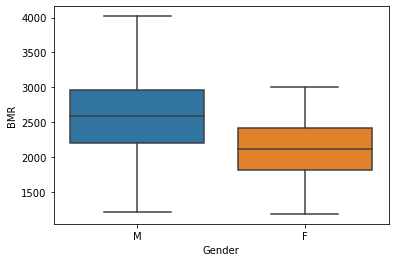

In [15]:
calories_boxplot_by_gender = sns.boxplot(x=data['Gender'], y=data['BMR'])

## Histogram

### BMI

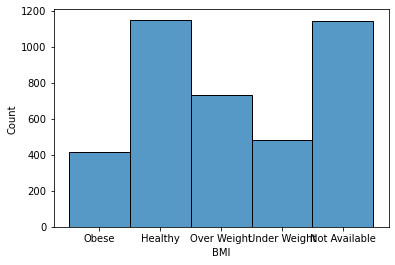

In [16]:
bmi_histoplot = sns.histplot(data=data, x='BMI')

### Income

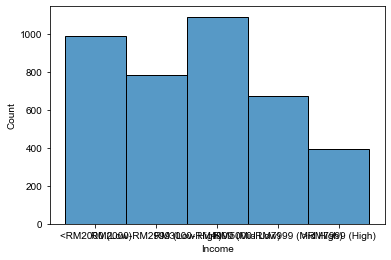

In [17]:
income_histoplot = sns.histplot(data=data, x='Income')
sns.set(font_scale=0.4)